# Title: Analysing Sales Trends During Diwali

# Objective: Cleaning the data and performing basic EDA to identify and examine sales patterns over the Diwali festive period

# Additional Aim: Derive insights from the data, supported by visualisations, to inform our inferences

#### Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### Loading the csv dataset 

In [2]:
df = pd.read_csv(r'E:\EDVANCER\GITHUB\Python_Diwali_Sales_Analysis\main_files\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


# Data Cleaning :

#### 1. View the datatypes and values briefly

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Notice the columns 'Status' and 'unnamed1' contain missing values => they're basically empty (missing data is presented as NaN in pandas)
## We can go ahead and remove said features from the dataset

#### 2. Handling missing values 

In [5]:
df = df.drop(['Status', 'unnamed1'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


### Now, notice the 'Amount' feature contains some missing values 

In [7]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#### 3. Handling the 'Amount' feature

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#### Note: we could have also imputed the missing value with the mean/median => using fillna 

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


#### 4. Changing the dtype of 'Amount' to int

In [11]:
df.Amount = df.Amount.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [14]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EDA : 

## 1. Observing the gender count 

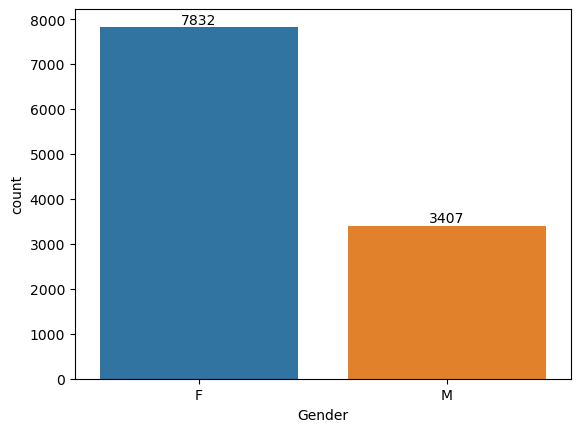

In [15]:
ax = sns.countplot(x='Gender', data = df);

for bars in ax.containers:
    ax.bar_label(bars)

## 2. Determining expenditure per gender 

In [16]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False);

In [17]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


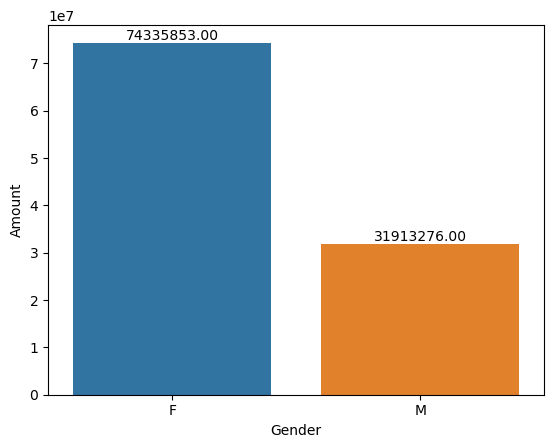

In [18]:
g1 = sns.barplot(x='Gender', y='Amount', data = sales_gen);

for bars in g1.containers:
    g1.bar_label(bars, labels = [f'{i.get_height():.2f}' for i in bars])

### Inferences: 
##### -> Majority of the shoppers are female
##### -> Females have spent over 2x more than males
##### -> This could imply that the purchasing power of females is considerably higher than that of males

## 3. Observing count of age groups

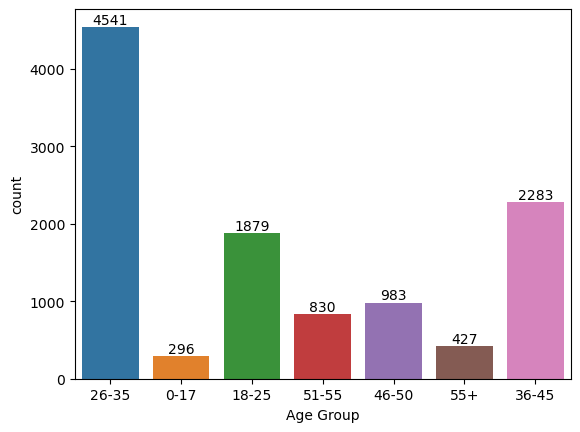

In [19]:
g2 = sns.countplot(x='Age Group', data = df);
for bars in g2.containers:
    g2.bar_label(bars)

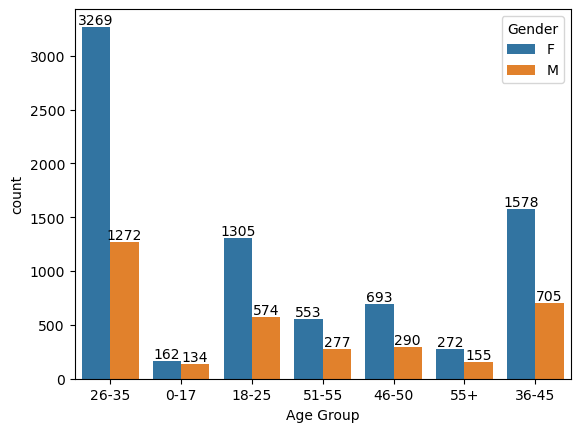

In [20]:
g3 = sns.countplot(x='Age Group', data = df, hue = 'Gender');
for bars in g3.containers:
    g3.bar_label(bars)

### Inference: 
##### -> Majority of the shoppers belong to the age group of 26-35, out of which female shoppers are significantly more

## 4. Determining expenditure per age group

In [21]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False);

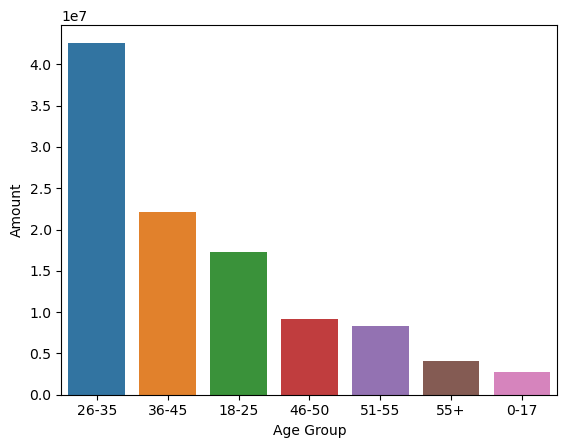

In [22]:
g4 = sns.barplot(x='Age Group', y='Amount', data = sales_age);

### Inference: 
##### -> People belonging to the age group of 26-35 have spent the most 

## 5. State-wise sales analysis

In [23]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10);

In [24]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


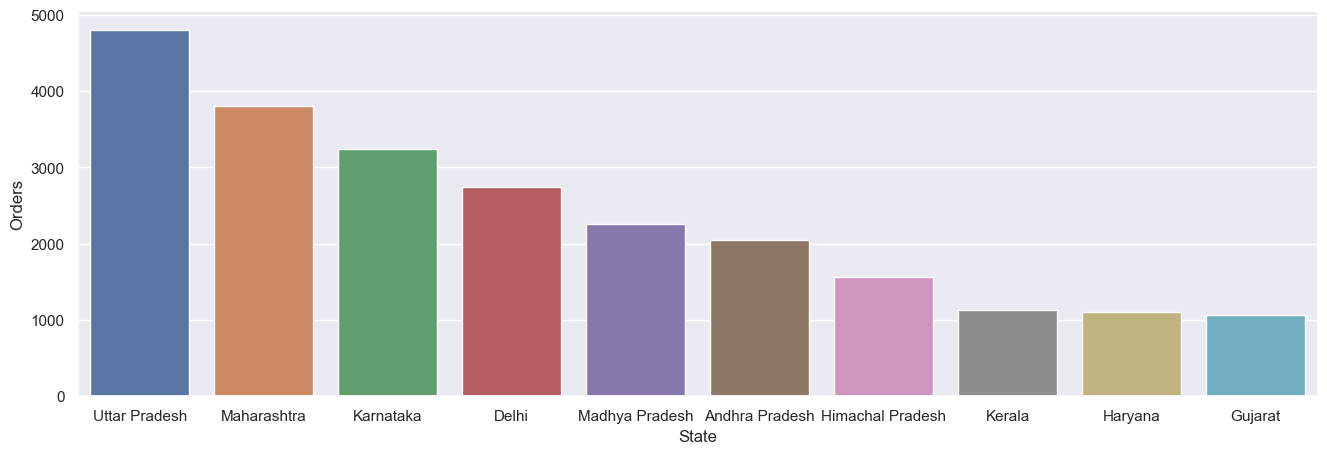

In [58]:
sns.set(rc = {'figure.figsize':(16,5)})
g5 = sns.barplot(data=sales_state, x='State', y='Orders');

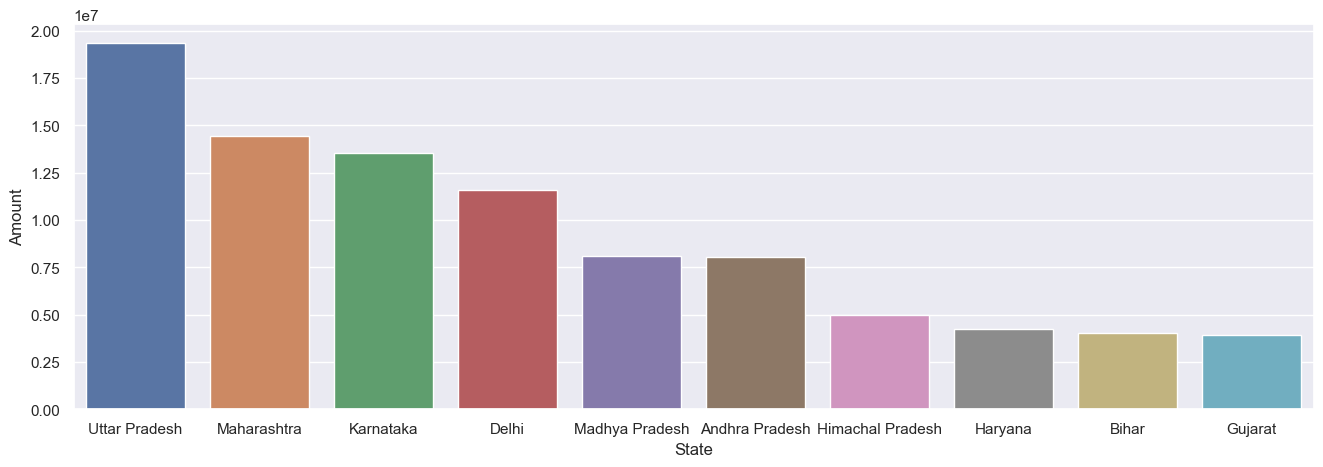

In [59]:
sales_state2 = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10);

sns.set(rc = {'figure.figsize':(16,5)})
g6 = sns.barplot(data=sales_state2, x='State', y='Amount');

### Inferences: 
##### -> Top 7 states with the most orders also have the highest net spend
##### -> Although Haryana has a lower no.of orders than Kerela, the net spend is higher 
##### -> Similarly, Bihar lies outside the top 10 states with the most orders made, however, the net spend is higher than that of Gujarat and Kerela



## 6. Sales analysis based on Marital Status

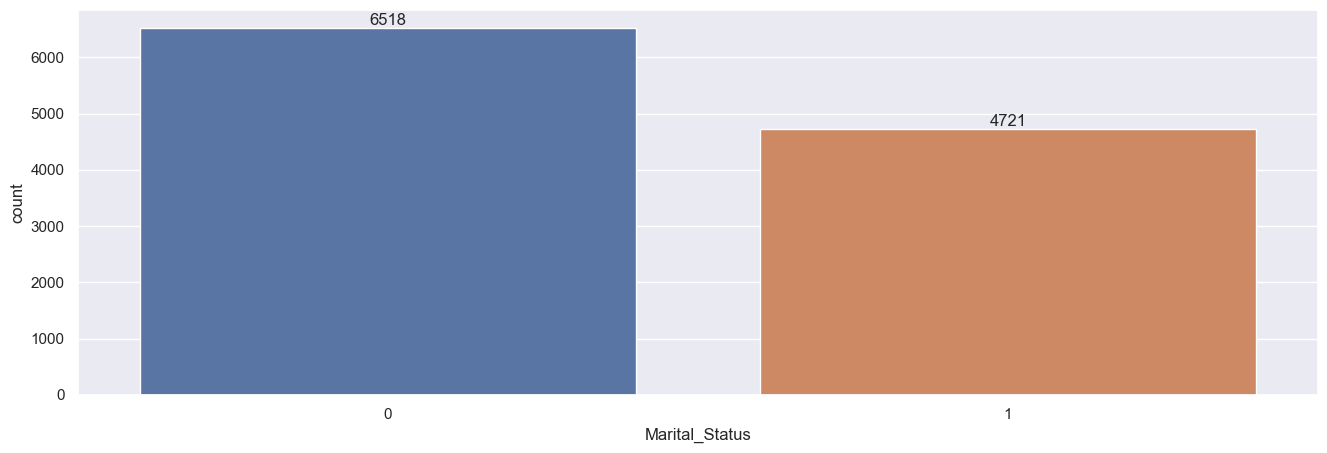

In [60]:
g7 = sns.countplot(data = df, x = 'Marital_Status')

for bars in g7.containers:
    g7.bar_label(bars)

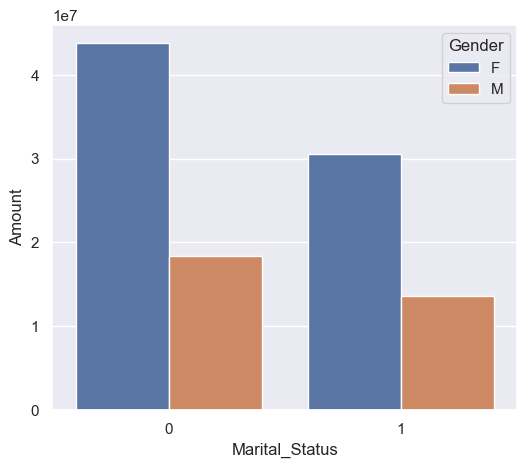

In [61]:
sales_mar = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False);
sns.set(rc = {'figure.figsize':(6,5)})


g8 = sns.barplot(data=sales_mar, x='Marital_Status', y='Amount', hue='Gender');

### Inference: 
##### -> Unmarried people (0) have spent more than married couples (1), with single women making up the majority of buyers

## 7. Occupation-based Analysis

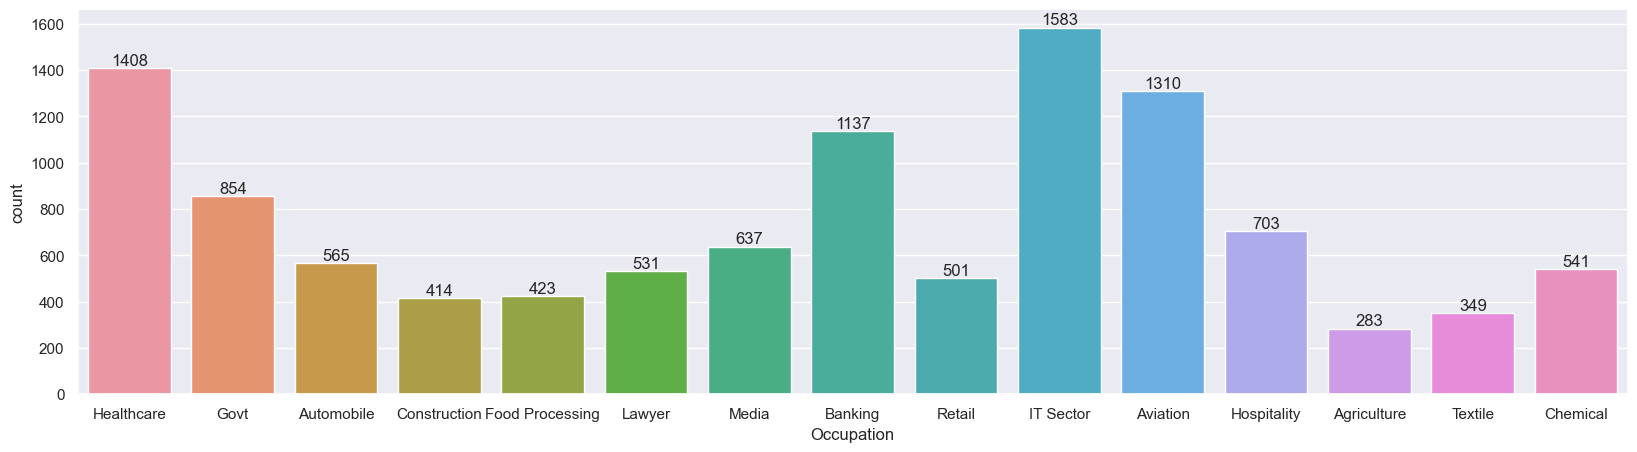

In [62]:
sns.set(rc = {'figure.figsize':(20,5)})
g9 = sns.countplot(x = 'Occupation', data = df)


for bars in g9.containers:
    g9.bar_label(bars)

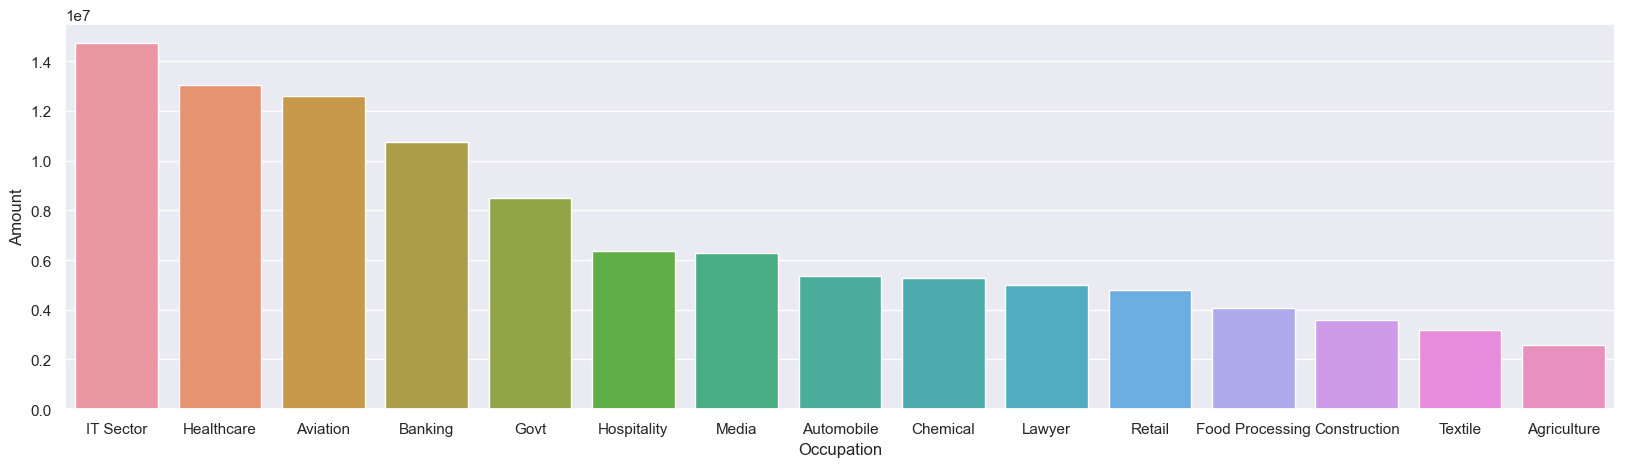

In [63]:
sales_occ = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False);
sales_occ

g10 = sns.barplot(data = sales_occ, x = 'Occupation', y = 'Amount');

### Inference: 
##### -> Most purchases have been made by people working in the IT sector, followed by healthcare and aviation sectors

## 8. Sales analysis based on Product Category

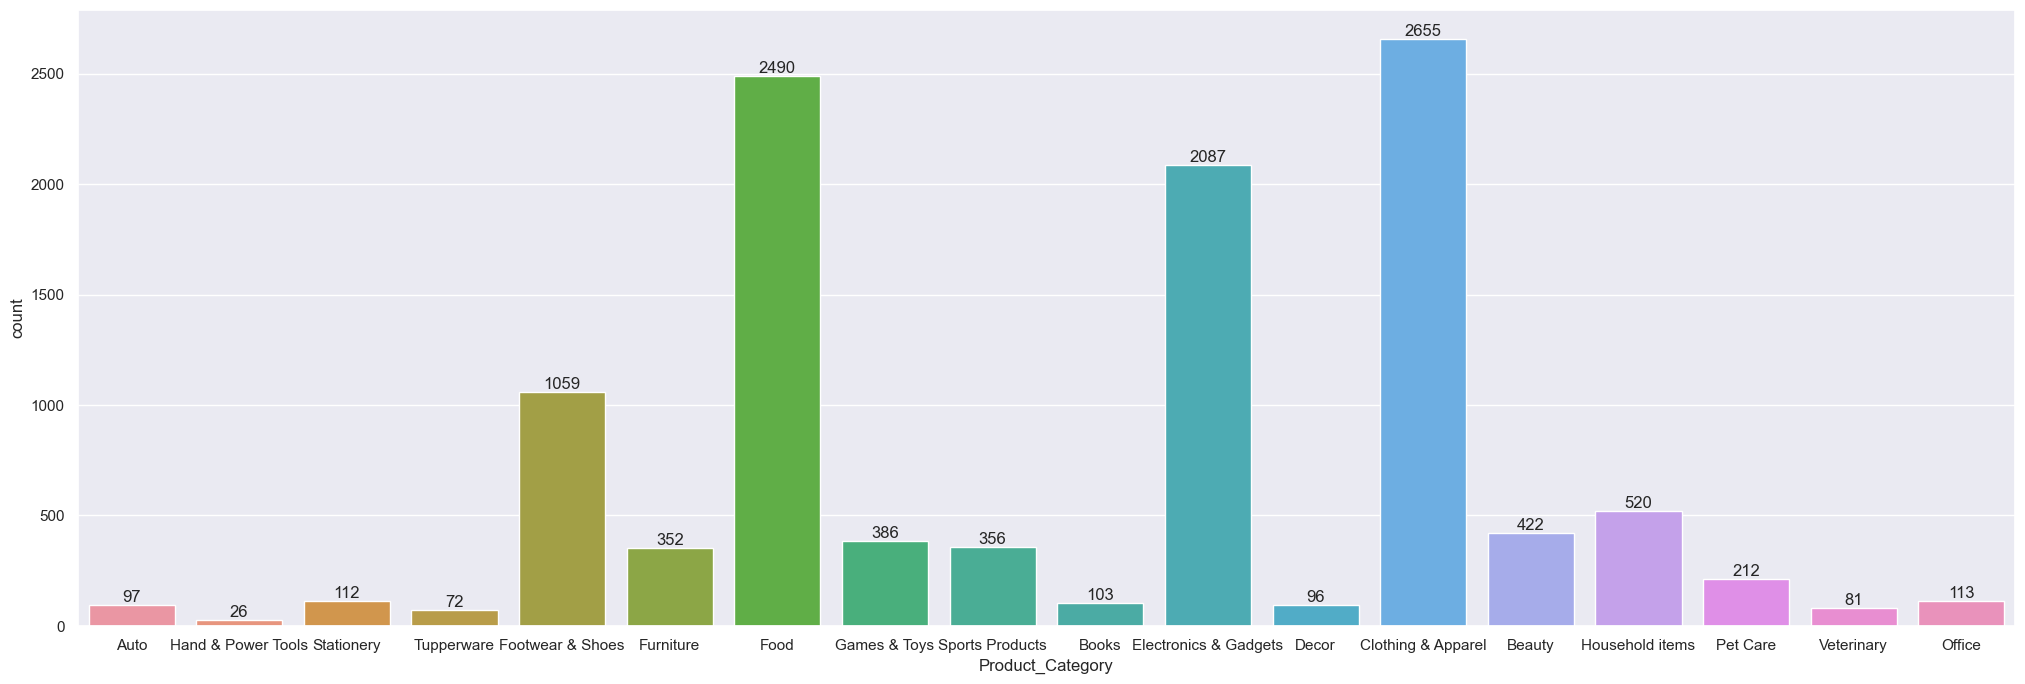

In [64]:
sns.set(rc = {'figure.figsize':(25,8)})

g11 = sns.countplot(data = df, x = 'Product_Category')

for bars in g11.containers:
    g11.bar_label(bars)

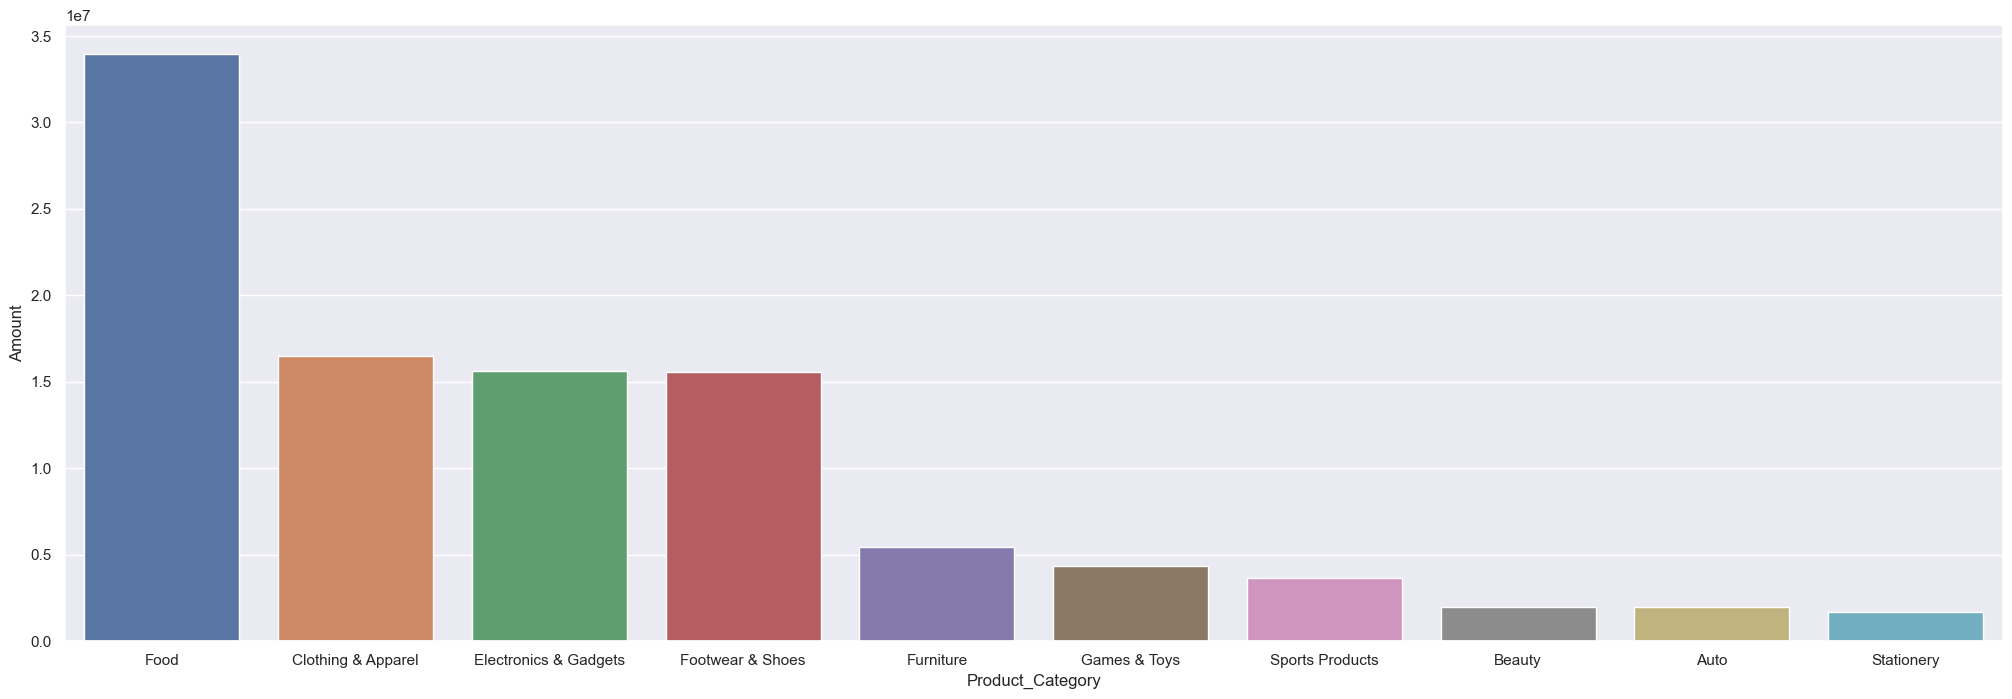

In [65]:
sales_prod = df.groupby(['Product_Category',],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10);

g12 = sns.barplot(data = sales_prod, x = 'Product_Category', y = 'Amount');

### Inferences: 
##### -> The top 3 categories with the most purchases are Clothing, Food, and Electronics (in that order)
##### -> However, its interesting to note that people have spent the most amount of money on food during this period

## Summary:

### Single/unmarried women working in the IT, healthcare, and aviation industries in UP, Maharashtra, and Karnataka, belonging to the age group of 26-35, have made the most purchases this Diwali and splashed the most amount of cash on categories including Food, Clothing, Electronics, and Footwear.

### ---------------------------------------------------------------------------------------------------------------------------------